# KERAS

In [1]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

Using TensorFlow backend.


In [2]:
#SAME MODEL BY FUNCTION API
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(32,activation='relu')(input_tensor)
output_tensor=layers.Dense(10,activation='softmax')(x)

model=models.Model(inputs=input_tensor,outputs=output_tensor)

# IMDB DATASET

In [3]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [4]:
import numpy as np
np.__version__

'1.16.2'

In [5]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [10]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
import numpy as np
# To Sparse Matrix
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [24]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [27]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [31]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 12s 792us/step - loss: 0.5343 - acc: 0.7746 - val_loss: 0.3942 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 8s 506us/step - loss: 0.3181 - acc: 0.8972 - val_loss: 0.3274 - val_acc: 0.8714
Epoch 3/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.2342 - acc: 0.9240 - val_loss: 0.2862 - val_acc: 0.8879
Epoch 4/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2746 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1527 - acc: 0.9510 - val_loss: 0.2998 - val_acc: 0.8808
Epoch 6/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1226 - acc: 0.9625 - val_loss: 0.2883 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1069 - acc: 0.9659 - val_loss: 

In [35]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

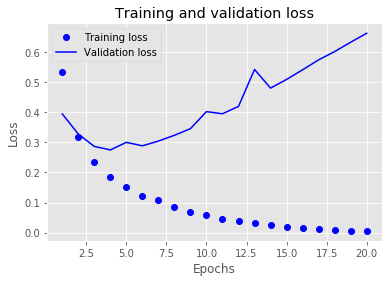

In [43]:
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.style.use('ggplot')
plt.legend()

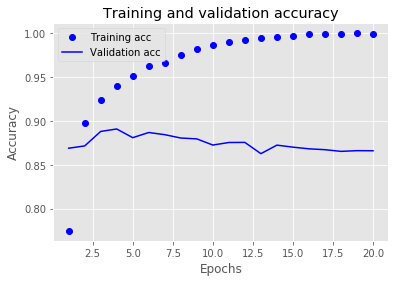

In [45]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 15s 586us/step - loss: 0.4750 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.2668 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.1987 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 18s 710us/step


In [48]:
print('Test Set Acc',results)

Test Set Acc [0.3234383964061737, 0.87288]


In [49]:
model.predict(x_test)

array([[0.13810307],
       [0.99972034],
       [0.29855746],
       ...,
       [0.07326642],
       [0.0426091 ],
       [0.4744229 ]], dtype=float32)

In [52]:
twolayermodel=models.Sequential()
twolayermodel.add(layers.Dense(32,activation='tanh',input_shape=(10000,)))
twolayermodel.add(layers.Dense(1,activation='sigmoid'))

twolayermodel.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 828us/step - loss: 0.1422 - acc: 0.9512 - val_loss: 0.1408 - val_acc: 0.9521
Epoch 2/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.1166 - acc: 0.9617 - val_loss: 0.1771 - val_acc: 0.9304
Epoch 3/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.0975 - acc: 0.9692 - val_loss: 0.1701 - val_acc: 0.9377
Epoch 4/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.0797 - acc: 0.9776 - val_loss: 0.1852 - val_acc: 0.9311
Epoch 5/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.0686 - acc: 0.9801 - val_loss: 0.2069 - val_acc: 0.9242
Epoch 6/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.0542 - acc: 0.9864 - val_loss: 0.2281 - val_acc: 0.9200
Epoch 7/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.0458 - acc: 0.9879 - val_loss: 0.2592 -

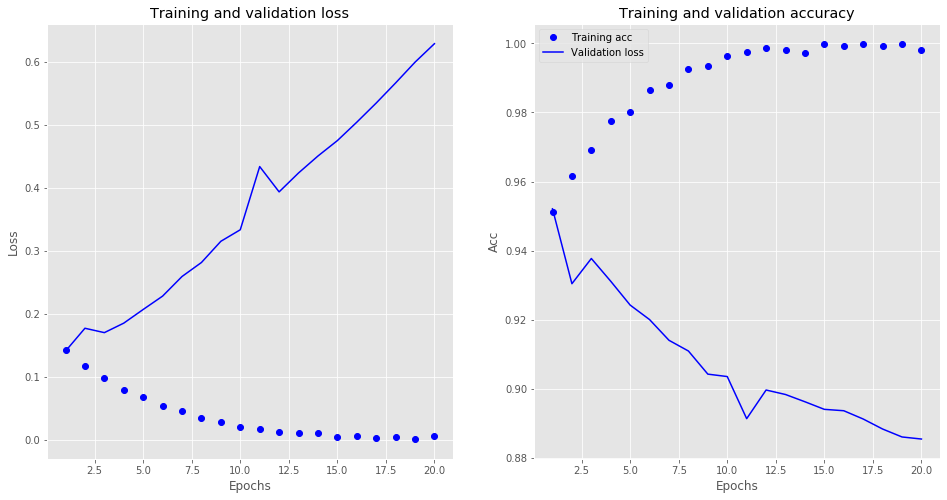

In [67]:
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['acc']
val_acc=history_dict['val_acc']
epochs=range(1,len(loss)+1)

fig,axes=plt.subplots(1,2,figsize=(16,8))

axes[0].plot(epochs,loss,'bo',label='Training loss')
axes[0].plot(epochs,val_loss,'b',label='Validation loss')
axes[1].plot(epochs,acc,'bo',label='Training acc')
axes[1].plot(epochs,val_acc,'b',label='Validation loss')
axes[0].set_title('Training and validation loss')
axes[1].set_title('Training and validation accuracy')
axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Acc')
plt.legend()
    
for ax in axes:
    ax.set_xlabel('Epochs')

In [68]:
twolayermodel=models.Sequential()
twolayermodel.add(layers.Dense(32,activation='tanh',input_shape=(10000,)))
twolayermodel.add(layers.Dense(1,activation='sigmoid'))

twolayermodel.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=3,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(x_test,y_test)
print('############ Test Set Accuracy :',results,' #############')

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 12s 802us/step - loss: 7.4668e-04 - acc: 1.0000 - val_loss: 0.6428 - val_acc: 0.8844
Epoch 2/3
15000/15000 [==============================] - 8s 541us/step - loss: 6.1652e-04 - acc: 1.0000 - val_loss: 0.6771 - val_acc: 0.8835
Epoch 3/3
25000/25000 [==============================] - 15s 612us/step
############ Test Set Accuracy : [1.0027652532887459, 0.8484]  #############


In [2]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [3]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [10]:
from keras.utils.np_utils import  to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [14]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 289us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 219us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 201us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [============

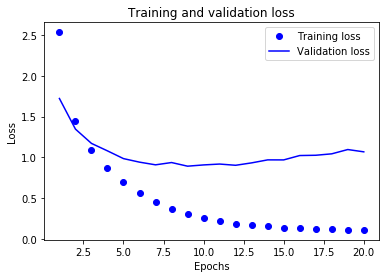

In [15]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

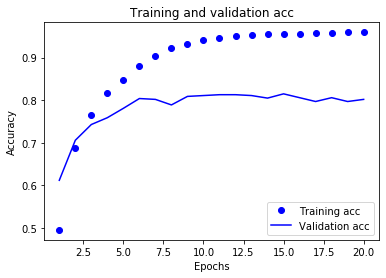

In [16]:
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
result=model.evaluate(x_test,one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 221us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 177us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 194us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 175us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [19]:
result

[1.0222080012887902, 0.7756010686194165]

In [21]:
predictions=model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999998
3


In [35]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [36]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 309us/step - loss: 3.1703 - acc: 0.2428 - val_loss: 2.6196 - val_acc: 0.2730
Epoch 2/20
7982/7982 [==============================] - 2s 249us/step - loss: 2.0641 - acc: 0.5432 - val_loss: 1.7029 - val_acc: 0.5850
Epoch 3/20
7982/7982 [==============================] - 2s 250us/step - loss: 1.5028 - acc: 0.6218 - val_loss: 1.5115 - val_acc: 0.6380
Epoch 4/20
7982/7982 [==============================] - 2s 252us/step - loss: 1.2897 - acc: 0.6906 - val_loss: 1.4152 - val_acc: 0.6740
Epoch 5/20
7982/7982 [==============================] - 2s 250us/step - loss: 1.1462 - acc: 0.7154 - val_loss: 1.3649 - val_acc: 0.6830
Epoch 6/20
7982/7982 [==============================] - 2s 250us/step - loss: 1.0404 - acc: 0.7305 - val_loss: 1.3420 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 2s 252us/step - loss: 0.9582 - acc: 0.7425 - val_loss: 1.3416 - val_acc: 0.7000


In [37]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57344/57026 [==============================] - 0s 7us/step


In [38]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

In [40]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [51]:
import numpy as np

k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
    print('Processing Fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target=train_targets[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                         train_targets[(i+1)*num_val_samples:]],axis=0)
    model=build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_target,verbose=0)
    all_scores.append(val_mae)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


In [54]:
all_scores

[2.0466333887364603, 2.2921694316486323, 2.798282979738594, 2.2184934143972868]

In [63]:

num_epochs=100
all_mae_histories=[]
for i in range(k):
    print('Processing Fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                         train_targets[(i+1)*num_val_samples:]],axis=0)
    model=build_model()
    history=model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0,
             validation_data=(val_data,val_targets))
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


In [64]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

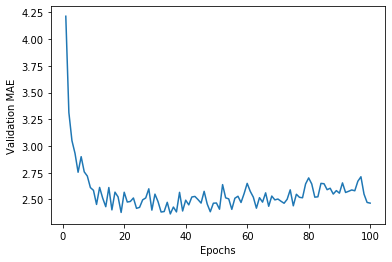

In [65]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

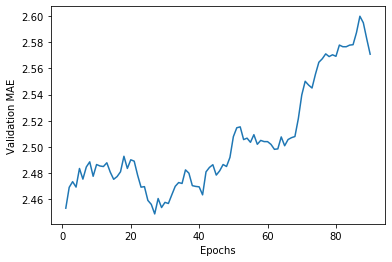

In [66]:
def smooth_curve(points,factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()